## MODÜLLERİN İMPORT EDİLMESİ

In [1]:
from TSCMaterialModels import Mander
from TSCConfimentBarsRules import ConfimentDesign as cd
from TSCResponseSpectra import SeismicInputs,SeismicTSC,SeismicResistanceBuildingInputs

d:\Belgelerim\files\Desktop\BAYardımcı\TBDY-2018-Malzeme-Modelleri\src\TSCResponseSpectra.py:135: SyntaxWarning: invalid escape sequence '\A'
  afad_spectra_params_df = pd.read_csv("Resource\AFAD_TDTH_parametre.csv")


## KULLANILACAK DEĞERLER

In [2]:
"""Units N,mm"""
Nd                      = 16000 
B                       = 400
H                       = 400
s                       = 80
TieRebarDiameter        = 8
LongnitRebarDiameter    = 14
ClearCoverConc          = 25
NumBarsTop              = 2
NumBarsInterior         = 1
NumBarsBot              = 2
X_tiebars               = 2
Y_tiebars               = 3
fsy                     = 220
fywe                    = 220
eps_su                  = 0.08
f_co                    = 25
f_ce                    = 25
Fctd                    = 10
Ln                      = 2600

## TBDY2018 DİKDÖRTGEN KOLON SARGI DONATISI TASARIMI

In [3]:
ConfinmentDesign = cd(Nd, fsy, Fctd, Ln, B, H, ClearCoverConc, X_tiebars, Y_tiebars, f_co, fywe, TieRebarDiameter, LongnitRebarDiameter)

Kolon Serbest Bölgesindeki Etriye Adeti - Etriye Çapi / SarılmaDışıAralık / OrtaSarılmadakiAralık / UçSarılmaAralık = 42 - ∅8 / 16 / 5 / 5


In [4]:
s = ConfinmentDesign.s_OptEndConfArea
s

52

## TBDY2018 MALZEME MODELLERİ (EK-5A)

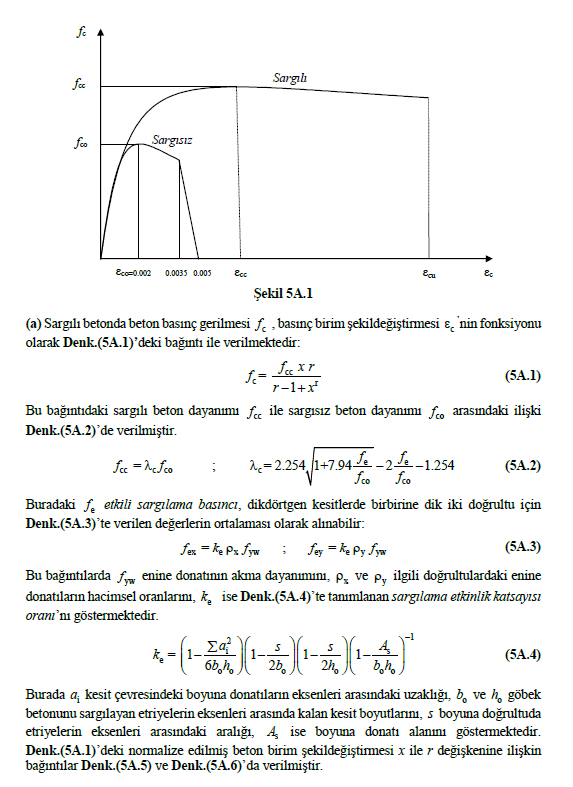    

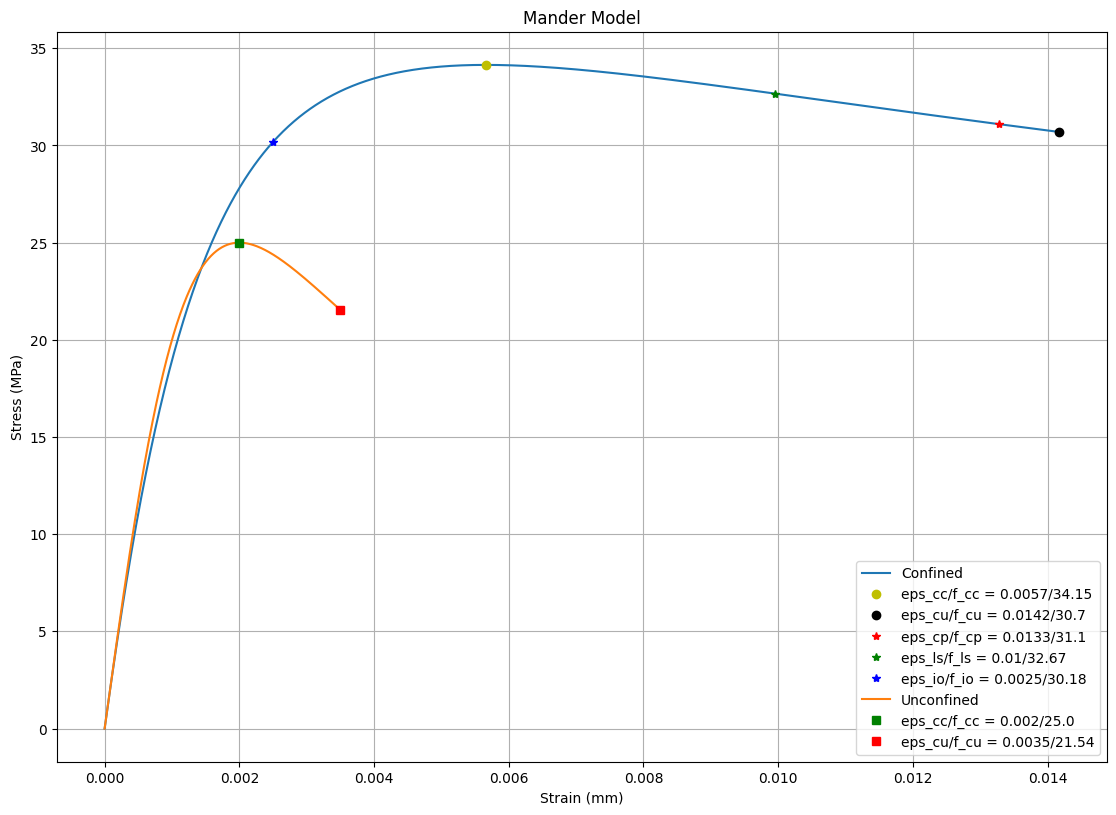

In [5]:
mander = Mander(B                    = B,
                H                    = H,
                s                    = s,
                TieRebarDiameter     = TieRebarDiameter,
                LongnitRebarDiameter = LongnitRebarDiameter,
                ClearCoverConc       = ClearCoverConc,
                NumBarsTop           = NumBarsTop,
                NumBarsInterior      = NumBarsInterior,
                NumBarsBot           = NumBarsBot,
                X_tiebars            = X_tiebars,
                Y_tiebars            = Y_tiebars,
                fsy                  = fsy,
                f_ywe                = fywe,
                eps_su               = eps_su,
                f_co                 = f_co,
                f_ce                 = f_ce
                )

mander.Plot_Manders()

## TBDY2018 HEDEF SPEKTRUMLARIN ELDE EDİLMESİ

In [6]:
SeismicVariables = SeismicInputs(lat = 39.85,lon = 30.2,soil = "ZC",intensity = "DD2")
StructureVariables = SeismicResistanceBuildingInputs(Hn = 70, R = 8.0, D = 3.0, I = 1.0)
rs = SeismicTSC(SeismicVariables = SeismicVariables,BuildingVariables = StructureVariables)

d:\Belgelerim\files\Desktop\BAYardımcı\TBDY-2018-Malzeme-Modelleri\src\TSCResponseSpectra.py:135: SyntaxWarning: invalid escape sequence '\A'
  afad_spectra_params_df = pd.read_csv("Resource\AFAD_TDTH_parametre.csv")


TypeError: type numpy.ndarray doesn't define __round__ method

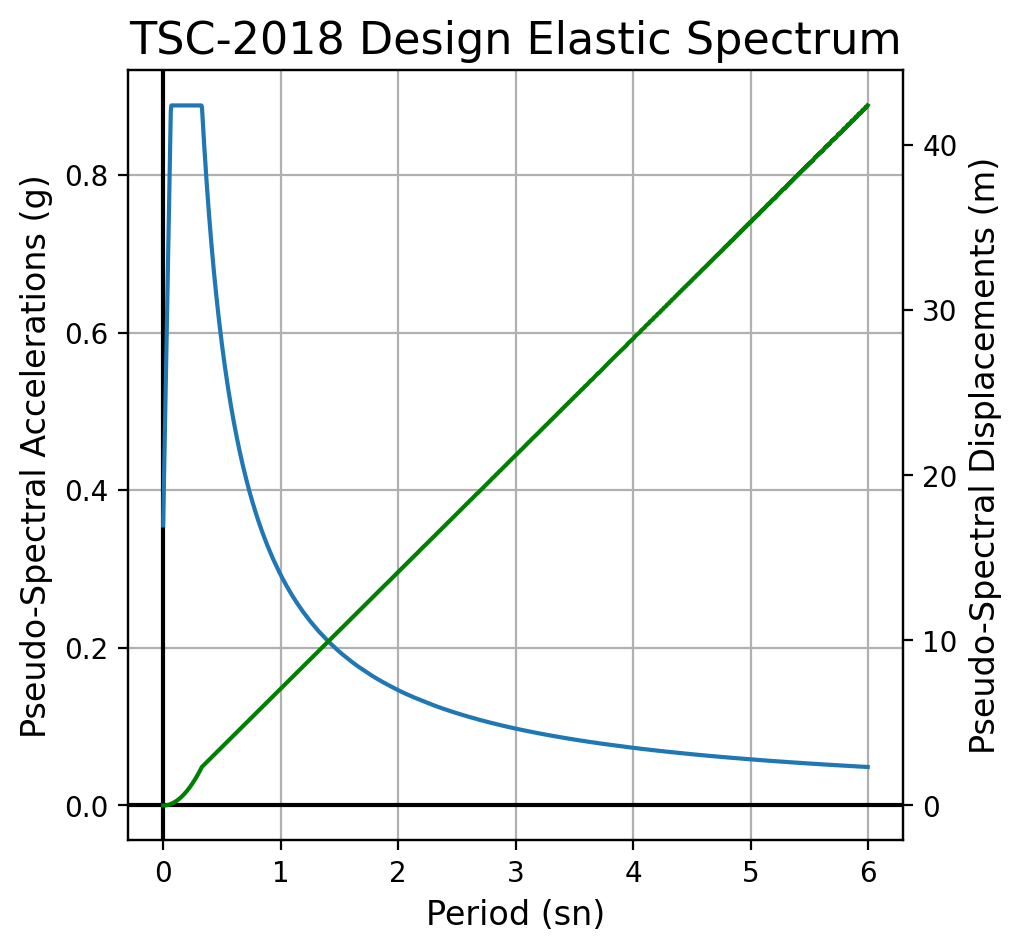

In [ ]:
rs.plot_HorizontalElasticSpectrum()

In [ ]:
rs.ElasticSpectrums.head(10)

,T,Sae,Sde,Sve,RaT,SaR
0,0.000,0.3552,0.000000,0.284187,3.000000,0.118400
1,0.005,0.3957,0.000239,0.381257,3.075905,0.128645
2,0.010,0.4361,0.001055,0.478327,3.151809,0.138365
3,0.015,0.4766,0.002593,0.575398,3.227714,0.147659
4,0.020,0.5170,0.005001,0.672468,3.303619,0.156495
5,0.025,0.5575,0.008425,0.710468,3.379524,0.164964
6,0.030,0.5979,0.013012,0.710468,3.455428,0.173032
7,0.035,0.6384,0.018910,0.710468,3.531333,0.180782
8,0.040,0.6788,0.026262,0.710468,3.607238,0.188177
9,0.045,0.7192,0.035216,0.710468,3.683142,0.195268


In [ ]:
SeismicVariables

Latitude :39.85
Longitude :30.2
Soil Class :ZC
Intensity:DD2
Ss :0.737
S1 :0.195
PGA :0.309
PGV :18.833
Fs :1.205
F1 :1.5
SDs :0.888085
SD1 :0.2925
TA :0.06587207305607008
TB :0.3293603652803504
TL :6.0

In [ ]:
StructureVariables

Hn :70
R :8.0
D :3.0
I :1.0
DTS :1a
BYS :2

In [ ]:
Sae_Tp = rs.Get_Sae_Tp(T=1.2)
Sae_Tp

0.2438

In [ ]:
Sar_Tp = rs.Get_SaR_Tp(T=1.2)
Sar_Tp

0.0305